In [1]:
import sys; sys.path.append('..')
import random
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pyzx as zx
import os
import pickle
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
def save_obj(obj, name):
    with open('data/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('data/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
def avg2(val1, val2):
    return (val1[2] + val2[2])/2 

def avg4(val1, val2, val3, val4):
    return (val1[2] + val2[2] + val3[2] + val4[2])/4

def merge_runtime(depth, qubits, tprob):
    lowbound = load_obj('random/rd_'+str(depth)+'_q_'+str(qubits)+'_t_0.'+str(tprob)) #load_obj('rd_'+str(depth)+'_q_'+str(qubits)+'_t_0.'+str(tprob))
    res = []
    res.append(lowbound['simulated_annealing_simp'][2])
    res.append(avg2(lowbound['greedy_simp_neighbors_c1'],lowbound['greedy_simp_neighbors_c-10']))
    res.append(avg4(lowbound['greedy_simp_c1_b_True'],lowbound['greedy_simp_c1_b_False'],lowbound['greedy_simp_c-10_b_True'],lowbound['greedy_simp_c-10_b_False']))
    res.append(avg4(lowbound['random_simp_c1_b_True'],lowbound['random_simp_c1_b_False'],lowbound['random_simp_c-10_b_True'],lowbound['random_simp_c-10_b_False']))
#     res.append(avg2(lowbound['greedy_simp_neighbors_c-20'],lowbound['greedy_simp_neighbors_c-30']))
#     res.append(avg4(lowbound['greedy_simp_c-20_b_True'],lowbound['greedy_simp_c-20_b_False'],lowbound['greedy_simp_c-30_b_True'],lowbound['greedy_simp_c-30_b_False']))
#     res.append(avg4(lowbound['random_simp_c-20_b_True'],lowbound['random_simp_c-20_b_False'],lowbound['random_simp_c-30_b_True'],lowbound['random_simp_c-30_b_False']))
    return res

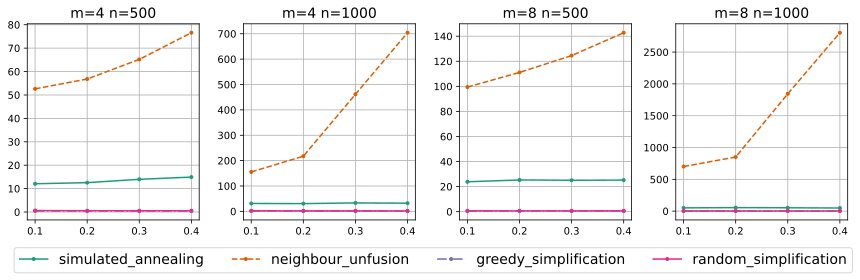

In [4]:
params = [[[500,4,[1,2,3,4]],[1000,4,[1,2,3,4]],[500,8,[1,2,3,4]],[1000,8,[1,2,3,4]]]]
names = ['simulated_annealing','neighbour_unfusion','greedy_simplification','random_simplification']
xs = ['0.1','0.2','0.3','0.4']
colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']
styles = ['-','--','-.','-','--','-.']
fig, axs = plt.subplots(len(params), len(params[0]), figsize=(12,3.5))

for i in range(0,len(params)):
    for j in range(0,len(params[i])):
        axs[j].set_title('m='+str(params[i][j][1])+' n='+str(params[i][j][0]),fontsize=14)
        yys = [merge_runtime(params[i][j][0],params[i][j][1],tprob) for tprob in range(1,5)]
        for k, ys in enumerate(list(zip(*yys))):
            axs[j].plot(xs, ys, c=colors[k], marker="o",markersize=3, linestyle=styles[k], label=names[k] if i==0 and j == 0 else '')
        axs[j].grid()

plt.figlegend(bbox_to_anchor=(.02, 0), loc='upper left',
          ncol=4, borderaxespad=0,fontsize=14)
# plt.suptitle('Average runtime of algorithms on $m$ qubit circuits with size $n$ and increasing T Gate probability',fontsize=12)
plt.tight_layout()

plt.show()

In [5]:
fig.savefig(r'/home/korbinian/Documents/master/stau21/Dokumentation/Latex/Bilder/evaluation/runtime_compare.pdf',bbox_inches='tight')